In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

/Users/ktamogashev/miniforge/envs/sb/lib/python3.11/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


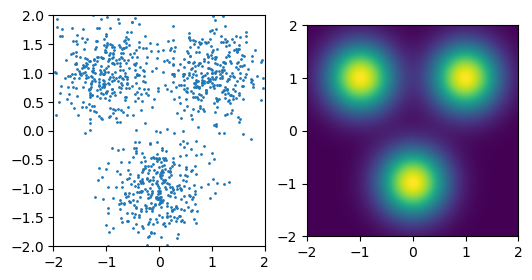

In [ ]:
modes = torch.tensor([[0, -1], [1, 1], [-1, 1]], dtype=torch.float32)
var=0.2

def sample(n):
    return torch.randn(n, 2)*np.sqrt(var) + modes[torch.randint(0, len(modes), (n,))]

def logdensity(x):
    distances = x[...,None] - modes.T
    return (-distances**2/(2*var) - 0.5*np.log(2*np.pi*var)).sum(1).logsumexp(-1) - np.log(len(modes))

plt.figure(figsize=(6,3))

plt.subplot(121)
plt.xlim(-2,2);plt.ylim(-2,2)
dataset = sample(1000)
plt.scatter(dataset[:, 0], dataset[:, 1], s=1)

plt.subplot(122)
X = torch.meshgrid(torch.linspace(-2, 2, 100), torch.linspace(-2, 2, 100))
X = torch.stack(X, -1).view(-1, 2)
plt.imshow(logdensity(X).exp().view(100, 100).numpy().T[::-1], extent=(-2, 2, -2, 2))

plt.show()

In [3]:
nn = torch.nn.Sequential(torch.nn.Linear(3, 256), torch.nn.ELU(), torch.nn.Linear(256, 256), torch.nn.ELU(), torch.nn.Linear(256, 2))
opt = torch.optim.Adam(nn.parameters(), lr=1e-3)

0 [-0.71212035  0.07591915]


/var/folders/cx/2l1rdkkx5vg9h87plft2cx2w0000gn/T/ipykernel_49722/2347653967.py:23: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  x_next = x + drift*dt + torch.randn_like(x)*np.sqrt(dt)


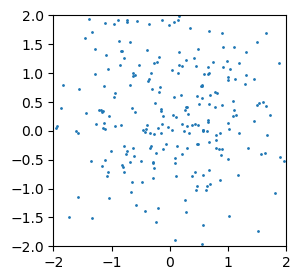

100 [-0.6015199 -0.0053257]
200 [-0.41532532 -0.00248384]
300 [-0.29904005  0.00359736]
400 [-0.26935548 -0.01397799]
500 [-0.24051948  0.00502887]
600 [-0.22471162 -0.00222677]
700 [-0.22661105 -0.00407262]
800 [-0.22420369 -0.01215039]
900 [-0.21410638 -0.00830825]
1000 [-0.19428338 -0.00184619]


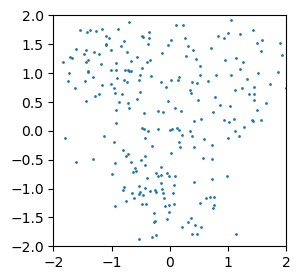

1100 [-0.1919458  -0.00504263]
1200 [-0.18822696 -0.00735869]
1300 [-0.17661208 -0.00637239]
1400 [-0.16981877 -0.00560559]
1500 [-0.17622996 -0.00392465]
1600 [-0.16656858 -0.00290981]
1700 [-0.15725344  0.00496363]
1800 [-0.1556435  0.0046938]
1900 [-0.16164721  0.00208743]
2000 [-0.15948227 -0.00347092]


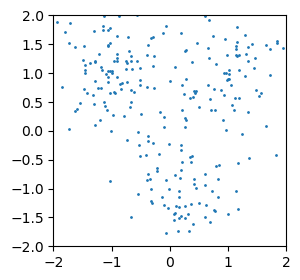

2100 [-0.15388568 -0.00499955]
2200 [-0.15118706  0.00415759]
2300 [-0.14862189 -0.002025  ]
2400 [-0.14943494 -0.00320641]
2500 [-0.15917961 -0.00314479]
2600 [-0.14639078 -0.00229116]
2700 [-0.15007086  0.00397295]
2800 [-0.14690474  0.00382034]
2900 [-0.1414439  -0.00158615]
3000 [-0.14599942 -0.00134208]


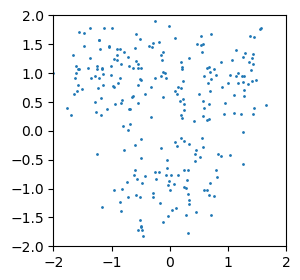

3100 [-0.14324928  0.00075595]
3200 [-0.13890534  0.00035776]
3300 [-0.14396173 -0.00186429]
3400 [-0.14525116 -0.00428981]
3500 [-0.14138478 -0.00211864]
3600 [-0.13819071 -0.00194276]
3700 [-0.13717524 -0.00200841]
3800 [-0.14548662 -0.00268918]
3900 [-0.13822486 -0.00424811]
4000 [-0.1407466   0.00268499]


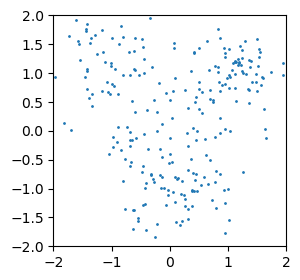

4100 [-1.35100151e-01 -7.64656067e-05]
4200 [-0.12248881  0.00951777]
4300 [-0.13112293  0.00455311]
4400 [-0.13424982 -0.00194023]
4500 [-0.13121811 -0.003393  ]
4600 [-0.13225349  0.00117521]
4700 [-0.12641094  0.00115399]
4800 [-0.12891215  0.00219989]
4900 [-0.13775554 -0.00754579]
5000 [-0.1263421   0.00323813]


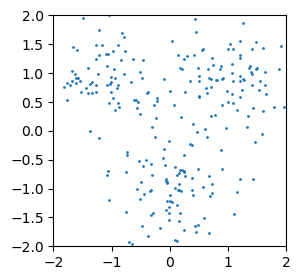

5100 [-0.12585243  0.00353087]
5200 [-0.13759373 -0.00103608]
5300 [-0.13264124 -0.0019435 ]
5400 [-0.12662476  0.00354379]
5500 [-0.12766094  0.00174439]
5600 [-0.13050239 -0.0047426 ]
5700 [-0.12420837 -0.00258456]
5800 [-0.12714103 -0.00311099]
5900 [-0.12829509  0.0001812 ]
6000 [-0.13260189 -0.00588364]


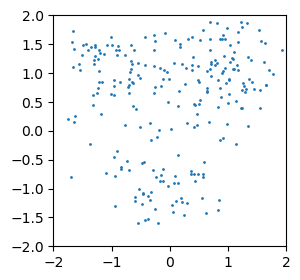

6100 [-0.11675342  0.00469367]
6200 [-0.12732694 -0.00464391]
6300 [-0.12386826  0.00111807]
6400 [-1.22061956e-01  1.77049637e-05]
6500 [-0.12274725 -0.00101882]
6600 [-0.12242285  0.00125124]
6700 [-0.12128548  0.00192773]
6800 [-0.11842996 -0.00075334]
6900 [-0.12375338  0.00100205]
7000 [-0.1237692   0.00226075]


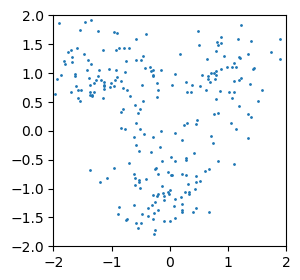

7100 [-0.12911972 -0.00599481]
7200 [-1.18917897e-01  1.18536949e-04]
7300 [-0.12176307  0.00185992]
7400 [-0.12356531  0.00173693]
7500 [-0.12989879 -0.00121911]
7600 [-1.20605879e-01 -1.07316971e-04]
7700 [-0.11617101  0.00428905]
7800 [-0.11012424  0.00432898]
7900 [-0.12532378  0.00151325]
8000 [-0.12273955 -0.00154066]


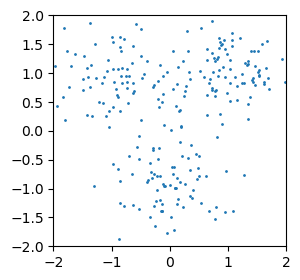

8100 [-0.11663918  0.00291939]
8200 [-0.11644963  0.00252975]
8300 [-0.12330293 -0.00208379]
8400 [-0.11333637  0.00244296]
8500 [-0.11535778 -0.00053014]
8600 [-0.11757195 -0.001327  ]
8700 [-0.11977389 -0.00143593]
8800 [-0.11478775 -0.00066394]
8900 [-0.11529146 -0.00139981]
9000 [-0.11203611  0.00135183]


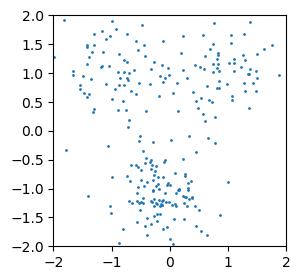

9100 [-0.12164576 -0.00411973]
9200 [-0.10897693  0.0020189 ]
9300 [-0.11769939 -0.00062486]
9400 [-0.12365338 -0.00050163]
9500 [-0.11809147 -0.00121589]
9600 [-0.10908126  0.00672995]
9700 [-0.1054122   0.00659239]
9800 [-0.11609582  0.0015577 ]
9900 [-0.10928772  0.00436354]


In [4]:
# PIS

bs = 256
N = 20
Tmax = 1
dt = torch.tensor(Tmax/N)
losses = []

def lognormal(x, mean, var): return -0.5 * ((x - mean)**2 / var + var.log() + np.log(2*np.pi)).sum(-1)

for it in range(10000):
    opt.zero_grad()

    x = torch.zeros((bs, 2))
    t = torch.zeros((bs, 1))

    logpf = torch.zeros((bs,))
    logpb = torch.zeros((bs,))
    logr = torch.zeros((bs,))

    for i in range(N):
        drift = nn(torch.cat([x, t], -1))
        x_next = x + drift*dt + torch.randn_like(x)*np.sqrt(dt)
        logpf += lognormal(x_next, x + drift*dt, dt)
        if i > 0: logpb += lognormal(x, x_next * t / (t+dt), dt * t / (t+dt))
        x = x_next
        t = t + dt

    logr = logdensity(x)
    loss = -(logr + logpb - logpf).mean()
    logz_iw = (logr + logpb - logpf).logsumexp(-1) - np.log(bs)

    loss.backward()
    opt.step()

    losses.append((-loss.item(), logz_iw.item()))

    if it % 100 == 0:
        print(it, np.array(losses)[-100:].mean(0))
    if it % 1000 == 0:
        plt.figure(figsize=(3,3))
        plt.scatter(x[:, 0].detach().numpy(), x[:, 1].detach().numpy(), s=1)
        plt.xlim(-2,2);plt.ylim(-2,2)
        plt.show()


In [103]:
nn = torch.nn.Sequential(torch.nn.Linear(3, 256), torch.nn.ELU(), torch.nn.Linear(256, 256), torch.nn.ELU(), torch.nn.Linear(256, 2))
opt = torch.optim.Adam(nn.parameters(), lr=1e-3)
energy = torch.nn.Sequential(torch.nn.Linear(2, 64), torch.nn.ELU(), torch.nn.Linear(64, 64), torch.nn.ELU(), torch.nn.Linear(64, 1))
opt_energy = torch.optim.Adam(energy.parameters(), lr=1e-4)

0 [ 3.09532857  4.19115162 -0.01617163]


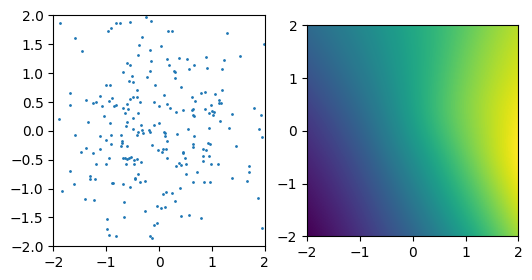

100 [ 4.26038743  5.0845304  -0.18583666]
200 [ 4.04018768  4.37481716 -0.66378501]
300 [ 3.6715694   3.79304595 -0.81446664]
400 [ 3.52397459  3.5775878  -0.66196475]
500 [ 3.53485584  3.56332374 -0.4772892 ]
600 [ 3.60293334  3.62058843 -0.3391138 ]
700 [ 3.68855158  3.70041959 -0.23274247]
800 [ 3.76773082  3.77940686 -0.1694342 ]
900 [ 3.84591668  3.85490388 -0.12541481]
1000 [ 3.90984943  3.91934595 -0.09575402]


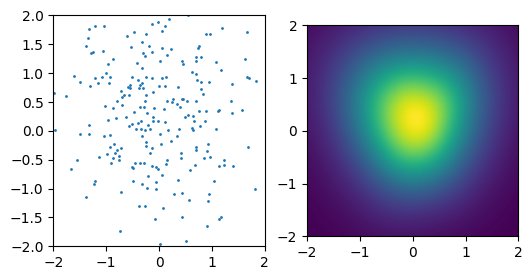

1100 [ 3.96397277  3.97651253 -0.09366657]
1200 [ 4.01258305  4.02224161 -0.0767657 ]
1300 [ 4.04452338  4.05242686 -0.07521748]
1400 [ 4.06826963  4.07833959 -0.06929158]
1500 [ 4.0799279   4.09068146 -0.07174907]
1600 [ 4.08173858  4.09256168 -0.07604332]
1700 [ 4.07806304  4.08690916 -0.07672398]
1800 [ 4.06164864  4.0720334  -0.0769194 ]
1900 [ 4.0346107   4.04514106 -0.08276281]
2000 [ 3.99617633  4.00619871 -0.09010357]


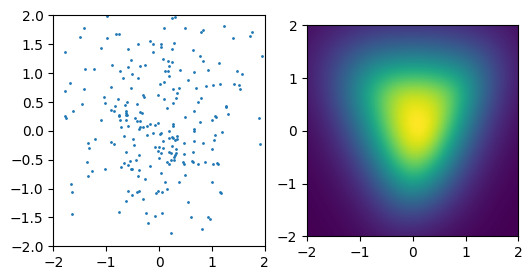

2100 [ 3.94291019  3.95605775 -0.09115854]
2200 [ 3.89036757  3.90241549 -0.09777925]
2300 [ 3.82105872  3.83507917 -0.11255925]
2400 [ 3.74812958  3.76088786 -0.11006821]
2500 [ 3.66254186  3.67829675 -0.13228127]
2600 [ 3.57548545  3.59108938 -0.13317934]
2700 [ 3.4863538   3.50376358 -0.15452706]
2800 [ 3.38913089  3.40887646 -0.16252702]
2900 [ 3.29201244  3.31376101 -0.18109853]
3000 [ 3.19628862  3.21895673 -0.19389294]


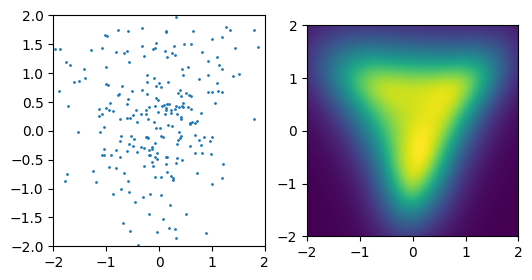

3100 [ 3.08941271  3.11507174 -0.20568866]
3200 [ 2.99176834  3.02144075 -0.22192963]
3300 [ 2.89439178  2.92613508 -0.22880669]
3400 [ 2.79969945  2.83405986 -0.24357066]
3500 [ 2.69842602  2.74073665 -0.25247194]
3600 [ 2.61141804  2.65454538 -0.26335813]
3700 [ 2.52797715  2.57547532 -0.26447257]
3800 [ 2.4378362   2.49089975 -0.26633524]
3900 [ 2.37573727  2.43265671 -0.26749627]
4000 [ 2.30593421  2.36930656 -0.26939124]


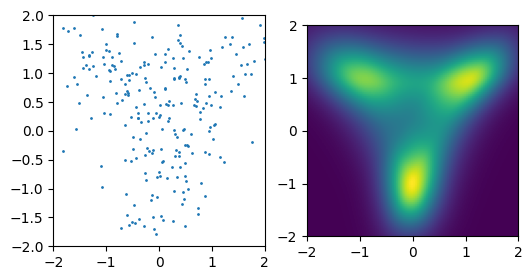

4100 [ 2.24727071  2.3117146  -0.26353742]
4200 [ 2.20088031  2.27429145 -0.25449207]
4300 [ 2.13746312  2.21386354 -0.26317316]
4400 [ 2.09566983  2.17929323 -0.2399394 ]
4500 [ 2.05209656  2.13660048 -0.24034438]
4600 [ 2.00671551  2.097438   -0.24148133]
4700 [ 1.97270785  2.07026354 -0.23132075]
4800 [ 1.95088411  2.04604434 -0.22437418]
4900 [ 1.9299233   2.03170823 -0.21324238]
5000 [ 1.89394558  1.99569722 -0.20226924]


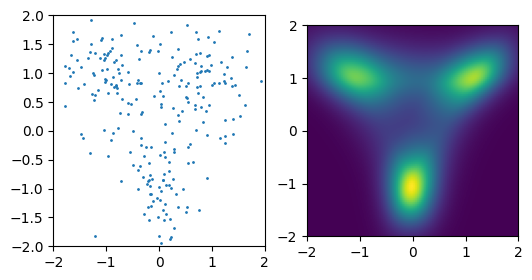

5100 [ 1.86810642  1.98042463 -0.18672768]
5200 [ 1.84180914  1.95290474 -0.18976559]
5300 [ 1.82986349  1.9425976  -0.17875547]
5400 [ 1.79631511  1.91679979 -0.15819645]
5500 [ 1.77895639  1.90677907 -0.15771693]
5600 [ 1.78630998  1.91904199 -0.14433037]
5700 [ 1.75964405  1.88500237 -0.1603533 ]
5800 [ 1.76092242  1.8927456  -0.13448422]
5900 [ 1.73850048  1.87001704 -0.13340735]
6000 [ 1.72039091  1.85679478 -0.12440678]


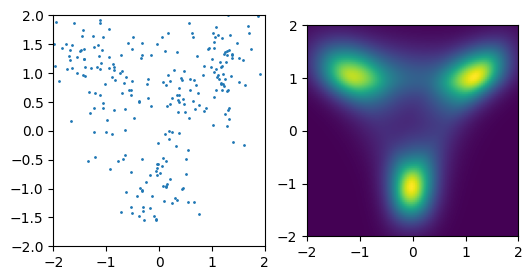

6100 [ 1.71706967  1.84747721 -0.12217394]
6200 [ 1.70104286  1.83449385 -0.11590873]
6300 [ 1.68305502  1.82103929 -0.11121079]
6400 [ 1.66150576  1.79994649 -0.10683712]
6500 [ 1.64099431  1.78120544 -0.10343238]
6600 [ 1.62373309  1.76269403 -0.09291665]
6700 [ 1.61584136  1.76796263 -0.08430061]
6800 [ 1.60950617  1.75589712 -0.09042977]
6900 [ 1.58406824  1.72880492 -0.08510669]
7000 [ 1.57761311  1.72796006 -0.07619745]


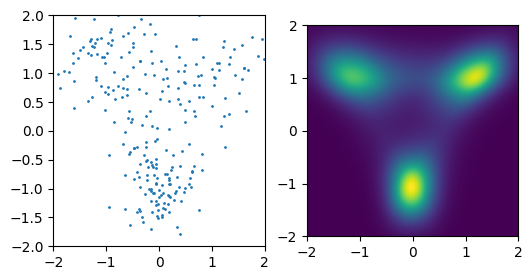

7100 [ 1.58450813  1.73056316 -0.06787329]
7200 [ 1.56331184  1.72067413 -0.0652654 ]
7300 [ 1.56273509  1.71648116 -0.05706867]
7400 [ 1.55766385  1.70839389 -0.06173909]
7500 [ 1.56462666  1.7149365  -0.05504197]
7600 [ 1.57666317  1.73014196 -0.06417134]
7700 [ 1.58421723  1.73470632 -0.06036134]
7800 [ 1.57004412  1.72379879 -0.0539443 ]
7900 [ 1.60194552  1.75341487 -0.05945677]
8000 [ 1.61005752  1.76561512 -0.03745221]


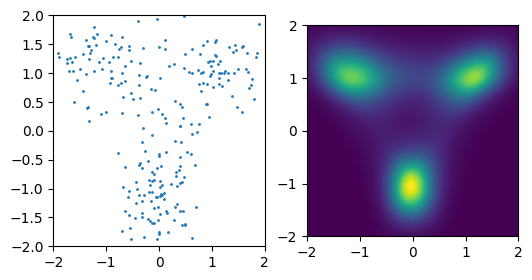

8100 [ 1.62836413  1.78119667 -0.05433345]
8200 [ 1.63048111  1.79066181 -0.04248923]
8300 [ 1.65625448  1.81097606 -0.04699215]
8400 [ 1.66904711  1.82749516 -0.04760548]
8500 [ 1.68057449  1.84515221 -0.02728474]
8600 [ 1.69493083  1.85190236 -0.02565352]
8700 [ 1.70343425  1.85860593 -0.04196908]
8800 [ 1.71997467  1.87863085 -0.04631538]
8900 [ 1.76854454  1.92106004 -0.03878889]
9000 [ 1.7788066   1.93337145 -0.03538221]


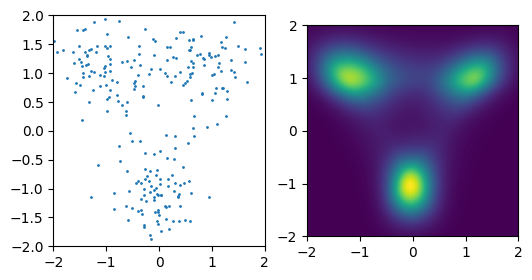

9100 [ 1.78221589  1.93716435 -0.04747533]


In [ ]:
# PIS with energy

bs = 256
N = 20
Tmax = 1
dt = torch.tensor(Tmax/N)
losses = []

def lognormal(x, mean, var): return -0.5 * ((x - mean)**2 / var + var.log() + np.log(2*np.pi)).sum(-1)

for it in range(10000):
    opt.zero_grad()

    x = torch.zeros((bs, 2))
    t = torch.zeros((bs, 1))

    logpf = torch.zeros((bs,))
    logpb = torch.zeros((bs,))
    logr = torch.zeros((bs,))

    for i in range(N):
        drift = nn(torch.cat([x, t], -1))
        x_next = x + drift*dt + torch.randn_like(x)*np.sqrt(dt)
        logpf += lognormal(x_next, x + drift*dt, dt)
        if i > 0: logpb += lognormal(x, x_next * t / (t+dt), dt * t / (t+dt))
        x = x_next
        t = t + dt

    logr = -energy(x)[...,0]
    loss = -(logr + logpb - logpf).mean()
    logz_iw = (logr + logpb - logpf).logsumexp(-1) - np.log(bs)

    loss.backward()
    opt.step()

    opt_energy.zero_grad()
    neg = energy(x.detach()).mean()
    pos = energy(dataset).mean()
    loss_energy = pos - neg
    loss_energy.backward()
    opt_energy.step()

    losses.append((-loss.item(), logz_iw.item(), loss_energy.item()))

    if it % 100 == 0:
        print(it, np.array(losses)[-100:].mean(0))
    if it % 1000 == 0:
        plt.figure(figsize=(6,3))
        plt.subplot(121)
        plt.scatter(x[:, 0].detach().numpy(), x[:, 1].detach().numpy(), s=1)
        plt.xlim(-2,2);plt.ylim(-2,2)

        plt.subplot(122)
        X = torch.meshgrid(torch.linspace(-2, 2, 100), torch.linspace(-2, 2, 100))
        X = torch.stack(X, -1).view(-1, 2)
        with torch.no_grad():
            plt.imshow((-energy(X)).exp().view(100, 100).numpy().T[::-1], extent=(-2, 2, -2, 2))
        plt.show()


In [52]:
dt

tensor(0.0500)